# 前処理（特徴エンジニアリング）

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [ ]:
"""
復習項目
・ブースティングの原理の理解
　->重要度との関連
 
・特量量の重要度はそのモデルの構築においての貢献度？？

"""

In [2]:
boston_df = pd.read_csv('csv/boston.csv')

In [4]:
print(boston_df.shape)

(506, 14)


In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#精度評価

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.metrics  import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

In [20]:
def learning(model, df):
    #データ分割
    X = df.drop('MEDV', axis=1)
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #学習、予測
    rfr_model = model
    rfr_model.fit(X_train, y_train)
    y_pred = rfr_model.predict(X_test).round(decimals=1)
    
    # 評価    
    print('決定係数（R2） = ', r2_score(y_test, y_pred).round(decimals=3))
    print('平均絶対誤差（MAE） = ', mean_absolute_error(y_test, y_pred).round(decimals=3))
    print('平均二乗誤差（MSE） = ', mean_squared_error(y_test, y_pred).round(decimals=3))
    print('対数平均二乗誤差（MSLE） = ', mean_squared_log_error(y_test, y_pred).round(decimals=3))
    print('平均二乗平方根誤差（RMSE） = ', np.sqrt(mean_squared_error(y_test, y_pred)).round(decimals=3))
    print('対数平方平均二乗誤差（RMSLE） = ', np.sqrt(mean_squared_log_error (y_test, y_pred)).round(decimals=3))
    
    return rfr_model, y_test, y_pred 


rfr_model, y_test, y_pred = learning(RFR(random_state=42), boston_df)

"""
決定係数は回帰式の当てはまりの良さを示す(y=y^-e)のeがいかに少ないか
→決定木は分割して予測値を出すので、線形の時はイメージが違う？？？
　　図で示して聞いてみる
 #疑問


・非線形モデルでまずまずの評価
 ->決定係数ならまだしも、他の評価は比較対象がないから良し悪しはわからないのでは？？？

"""

決定係数（R2） =  0.892
平均絶対誤差（MAE） =  2.04
平均二乗誤差（MSE） =  7.902
対数平均二乗誤差（MSLE） =  0.02
平均二乗平方根誤差（RMSE） =  2.811
対数平方平均二乗誤差（RMSLE） =  0.142


## 特徴量重要度

In [24]:
#ランダムフォレスト
def rfr_importance(df):
    # データ分割
    X = df.drop(columns='MEDV', axis=1)
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # モデリング
    clf_rf = RFR()
    clf_rf.fit(X_train, y_train)
    y_pred = clf_rf.predict(X_test)
    
    print(' RMSE = {:>.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    
    #重要度
    fimp = clf_rf.feature_importances_
    
    #デーフレームに変換
    imp_df = pd.DataFrame()
    imp_df['項目名'] = df.columns[:-1]
    imp_df['重要度'] = fimp.round(decimals=3).astype(str)
    
    return imp_df

imp_df = rfr_importance(boston_df)
imp_df.sort_values(by='重要度', ascending=False)

 RMSE = 4.580


,項目名,重要度
12,LSTAT,0.444
5,RM,0.383
0,CRIM,0.041
7,DIS,0.034
10,PTRATIO,0.026
4,NOX,0.018
9,TAX,0.016
6,AGE,0.013
2,INDUS,0.009
11,B,0.009


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [02:59:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [02:59:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


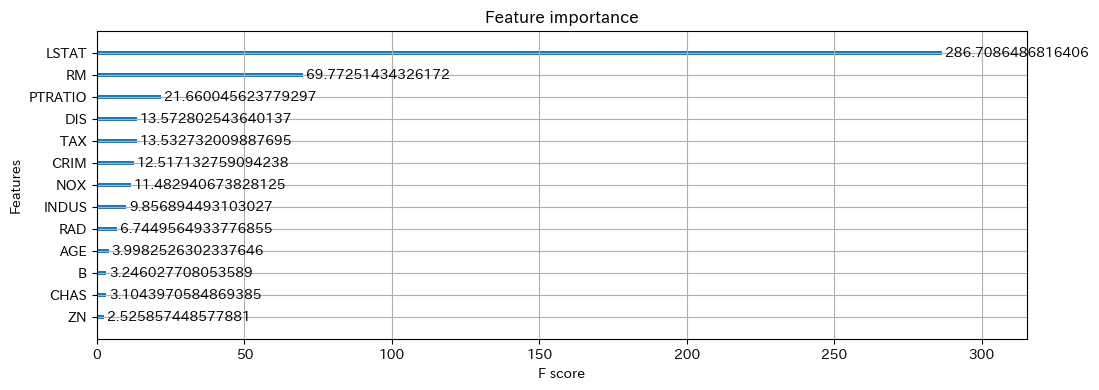

In [26]:
import xgboost as xgb

def boost_importance(df):
    # データ分割
    X = df.drop(columns='MEDV', axis=1)
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # パラメータ
    #silentは学習中の出力メッセージを表示するかどうか
    xgb_params = {"objective": "reg:linear", "eta": 0.1, "max_depth": 6, "silent": 1}
    num_rounds = 100

    # XGBoost用のデータセットの作成
    dtrain = xgb.DMatrix(X_train, label=y_train)

    # 学習
    gbdt = xgb.train(xgb_params, dtrain, num_rounds)
    
    #重量度
    _, ax = plt.subplots(figsize=(12, 4))
    
    #gain：その特徴量を使用した分岐でどれくら損失関数が減少したのか
    xgb.plot_importance(gbdt, ax=ax, importance_type='gain')
    
boost_importance(boston_df)

スコア：4.926
選択項目数：11、除外項目数:2


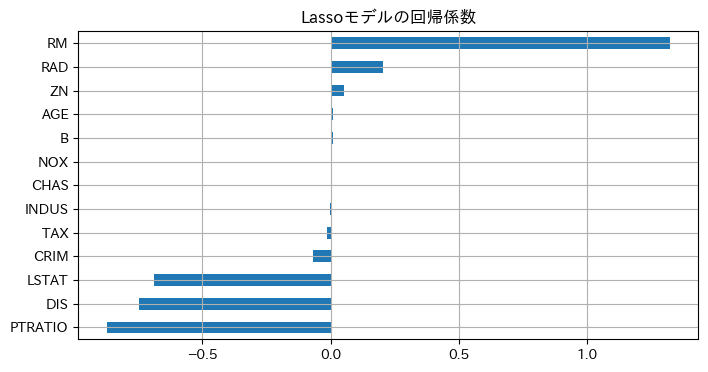

In [27]:
#線形回帰モデル
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def linear_importance(df):
    X = df.drop(columns='MEDV', axis=1)
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    def rmse_cv(model):
        rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
        return(rmse)
    
    #lassoモデルでスコア
    model_lasso = LassoCV().fit(X_train, y_train)
    print(f'スコア：{rmse_cv(model_lasso).mean().round(decimals=3)}')
    
    #回帰係数
    coef = pd.Series(model_lasso.coef_, index=X_train.columns)
    
    #Trueの数(1)の合計でカウントしている
    print('選択項目数：' + str(sum(coef != 0)) + '、除外項目数:' + str(sum(coef == 0)))
    
    #描画
    plt.figure(figsize=[8,4])
    imp_coef = coef.sort_values()
    imp_coef.plot(kind = "barh").grid()
    plt.title("Lassoモデルの回帰係数")
    
linear_importance(boston_df)

"""
lassoによる正則化で重要でない係数が0になるのは分かるが、lasso後の回帰係数をbarhで表す意味はあるのだろうか

"""

MSE: 4.549660150479038


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 24.205658924206478
Prediction_local [22.30187953]
Right: 21.44464008500851


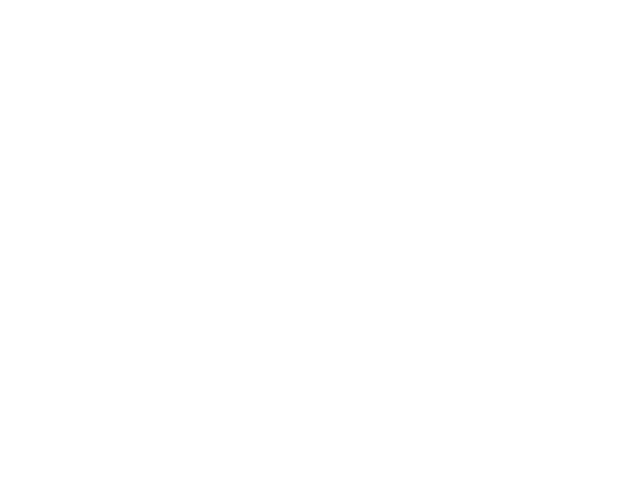

<Figure size 640x480 with 0 Axes>

In [41]:
import lime
import lime.lime_tabular

def explain_importance(df):
    # データ分割
    X = df.drop(columns='MEDV', axis=1)
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # ランダム・フォレスト（回帰）
    model = RFR(max_depth=6, random_state=0, n_estimators=10)
    model.fit(X_train, y_train)
    
    #設定しているパラメータ
    # RFR(bootstrap=True, criterion='mse', max_depth=6,
    #                       max_features='auto', max_leaf_nodes=None,
    #                       min_impurity_decrease=0.0, min_impurity_split=None,
    #                       min_samples_leaf=1, min_samples_split=2,
    #                       min_weight_fraction_leaf=0.0, n_estimators=10,
    #                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
    #                       warm_start=False)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)**0.5
    print(f'MSE: {mse}')
    
    #予想の判断根拠を示す（LIME）
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(), class_names=['MEDV'],
                                                       verbose=True, mode='regression', random_state=0)
    
    #解釈結果（予想結果への影響）を表示する
    j = 5
    exp = explainer.explain_instance(X_test.values[j], model.predict, num_features=6)
    exp.show_in_notebook(show_table=True)
    

from IPython.display import Image
explain_importance(boston_df)
plt.savefig("newplot_lime.png")
Image("./newplot_lime.png")

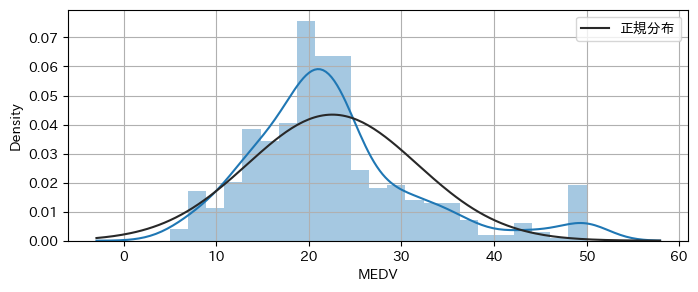

In [44]:
#正規分布への変換
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
plt.figure(figsize=[8,3])
sns.distplot(boston_df['MEDV'], kde=True, fit=norm, fit_kws={'label':'正規分布'}).grid()
plt.legend()

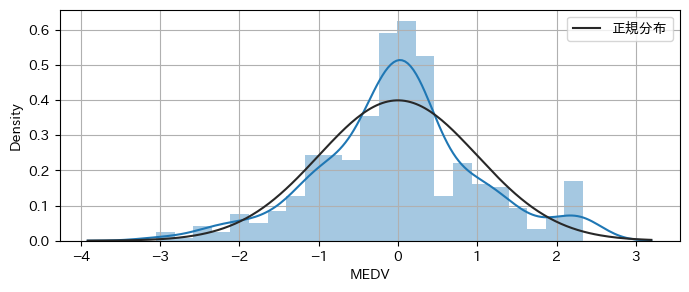

In [49]:
# Yeo-Johnson変換
from sklearn.preprocessing import PowerTransformer

yeo_jonshon_df = boston_df.copy()
sk_yeojohnson = PowerTransformer(method='yeo-johnson')
yeojohnson_data = sk_yeojohnson.fit_transform(yeo_jonshon_df[['MEDV']])
yeo_jonshon_df['MEDV'] = yeojohnson_data

#描写
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
plt.figure(figsize=[8,3])
sns.distplot(yeo_jonshon_df['MEDV'], kde=True, fit=norm, fit_kws={'label': '正規分布'}).grid()
plt.legend()

"""
yeo_jonshon_df['MEDV']に負値が含まれるので使えない（線形モデル評価にエラー）

ランダムフォレストには効果があった
？？？#疑問
"""

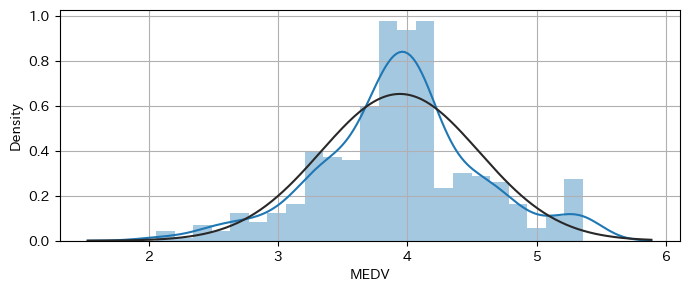

In [58]:
#Box-Cox変換
from scipy.special import boxcox1p

boxcox_df = boston_df.copy()
lam=0.15
boxcox_df['MEDV'] = boxcox1p(boxcox_df['MEDV'], lam)

plt.figure(figsize=[8,3])
sns.distplot(boxcox_df['MEDV'], kde=True, fit=norm, fit_kws={'label': '正規分布'}).grid()

"""
非線形モデルには逆効果だった。
???#疑問

"""

## 外れ値処理

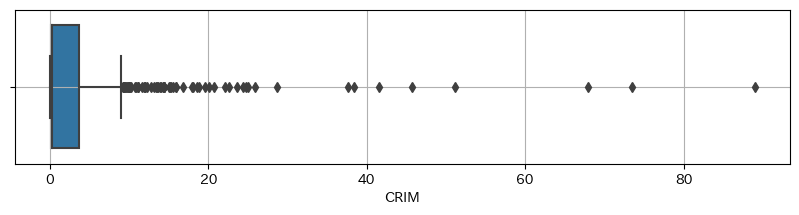

In [59]:
plt.figure(figsize=[10,2])
sns.boxplot(data=boston_df, x='CRIM').grid()

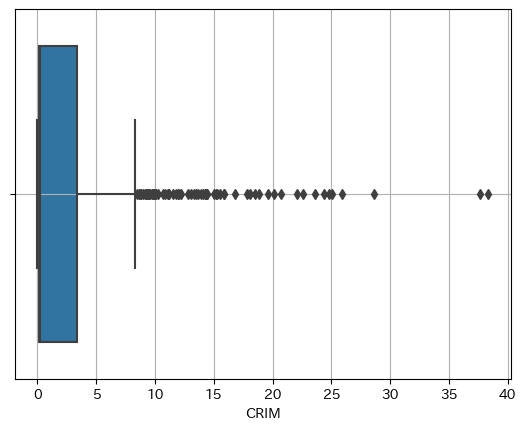

In [60]:
#外れ値除去
boston_df = boston_df[boston_df['CRIM']<40]
boston_df = boston_df.reset_index()
sns.boxplot(data=boston_df, x='CRIM').grid()

(493, 16)

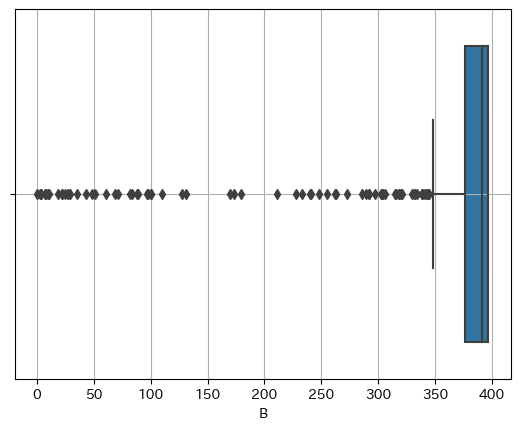

In [61]:
sns.boxplot(data=boston_df, x='B').grid()

# 外れ値除去
boston_df = boston_df[boston_df['B']>10]
boston_df = boston_df.reset_index()

## スケーリング

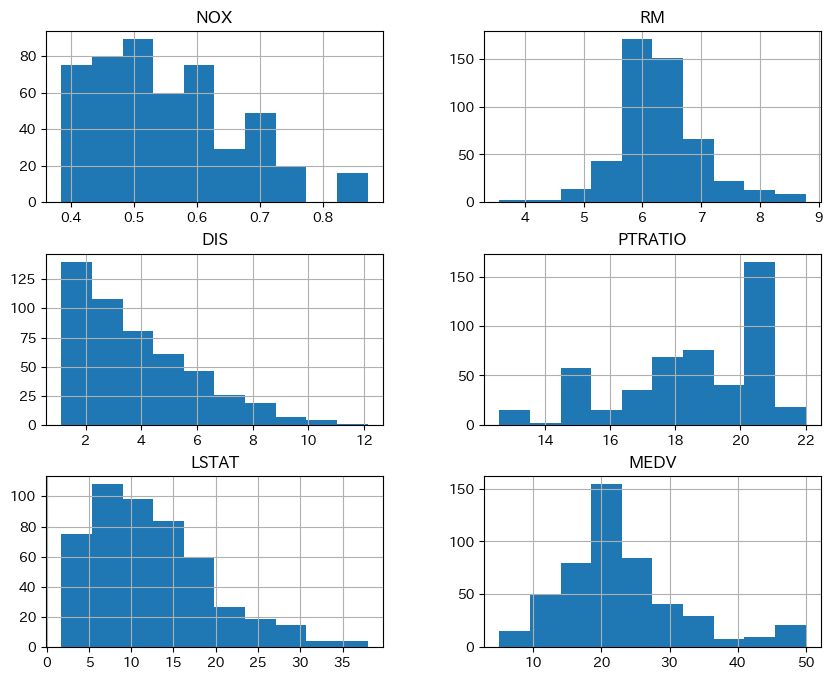

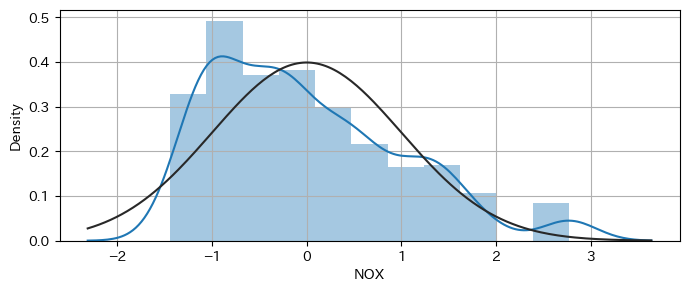

In [67]:
col = ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'MEDV']
boston_df[col].hist(bins=10, figsize=(10,8))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_df['NOX'] = scaler.fit_transform(boston_df[['NOX']])

plt.figure(figsize=[8, 3])
sns.distplot(boston_df['NOX'], kde=True, fit=norm, fit_kws={'label':'正規分布'}).grid()

"""
標準化してもヒストグラムの形は変わらないのでは

"""

# 特徴量生成

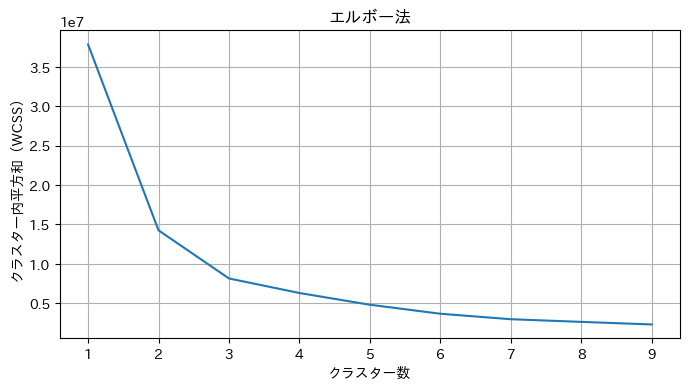

In [69]:
from sklearn.cluster import KMeans

def elbow(df):
    wcss = []
    for i in range(1, 10):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        
    plt.figure(figsize=[8,4])
    plt.plot(range(1, 10), wcss)
    plt.title('エルボー法')
    plt.xlabel('クラスター数')
    plt.ylabel('クラスター内平方和（WCSS）')
    plt.grid()
    plt.show()

elbow(boston_df)

<BarContainer object of 3 artists>

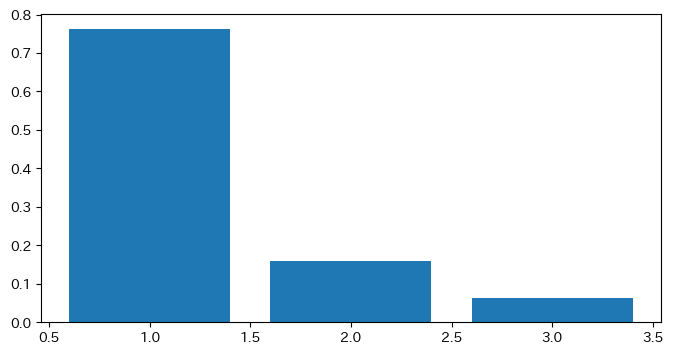

In [76]:
#主成分分析
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(boston_df)
plt.figure(figsize=[8,4])
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_) + 1)], pca.explained_variance_ratio_)

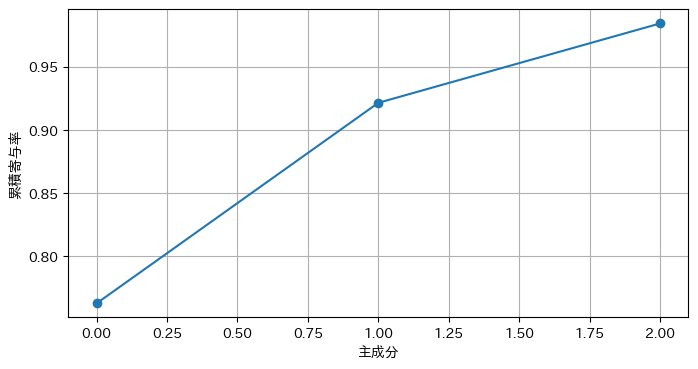

In [77]:
# 累積寄与率
contribution_ratio = pca.explained_variance_ratio_
accumulation_ratio = np.cumsum(contribution_ratio)
cc_ratio = np.hstack([0, accumulation_ratio])

plt.figure(figsize=[8,4])
plt.plot(accumulation_ratio, "-o")
plt.xlabel("主成分")
plt.ylabel("累積寄与率")
plt.grid()
plt.show()

In [83]:
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios.round(decimals=2).astype('str').head()
print(f"累積寄与率：　{contribution_ratios[contribution_ratios.index<5].sum().round(decimals=2).astype('str').values}")

"""
なぜcontribution_ratios.index<5？？
n_components=3設定したから、5未満になるのは必然では？
"""

累積寄与率：　['0.98']


'\nなぜcontribution_ratios.index<5？？\n|n_components=3設定したから、5未満になるのは必然では？\n'

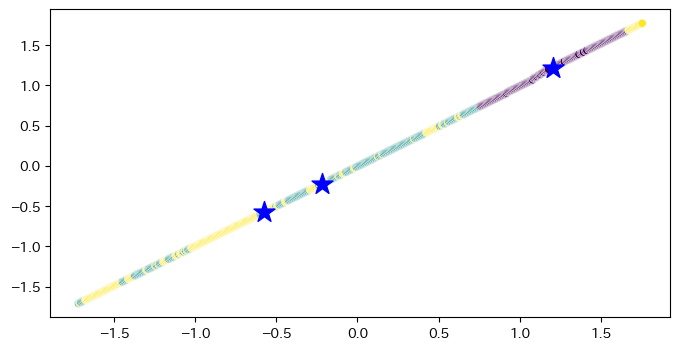

In [92]:
sc =StandardScaler()
data_norm = sc.fit_transform(boston_df)

cls = KMeans(n_clusters = 3)
result = cls.fit(data_norm)
pred = cls.fit_predict(data_norm)

plt.figure(figsize=[8, 4])
sns.scatterplot(x = data_norm[:, 0], y=data_norm[:, 1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, marker='*', c='b')

"""
boston_df.columns
Index(['level_0', 'index', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
カラム名からreset.index()で生成されたindexの2つを散布図にとっていることがわかった。
この'level_0', 'index'の散布図から何が分かるのか？？？
#疑問



"""



In [93]:
boston_df.columns

Index(['level_0', 'index', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [94]:
boston_df

,level_0,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0,0.00632,18.0,2.31,0,-0.117120,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,1,0.02731,0.0,7.07,0,-0.715355,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,2,0.02729,0.0,7.07,0,-0.715355,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,3,0.03237,0.0,2.18,0,-0.810726,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,4,0.06905,0.0,2.18,0,-0.810726,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,495,501,0.06263,0.0,11.93,0,0.186333,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
489,496,502,0.04527,0.0,11.93,0,0.186333,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
490,497,503,0.06076,0.0,11.93,0,0.186333,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
491,498,504,0.10959,0.0,11.93,0,0.186333,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


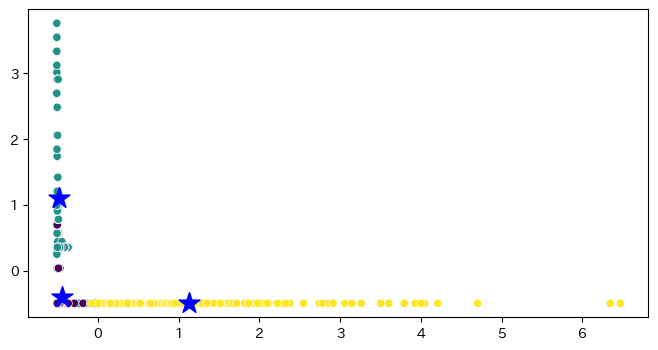

In [112]:
#indexを削除してみた

drop_boston =boston_df.drop(['level_0', 'index'], axis=1)



sc =StandardScaler()
data_norm = sc.fit_transform(drop_boston)

cls = KMeans(n_clusters = 3)
result = cls.fit(data_norm)
pred = cls.fit_predict(data_norm)

plt.figure(figsize=[8, 4])
sns.scatterplot(x = data_norm[:, 0], y=data_norm[:, 1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, marker='*', c='b')

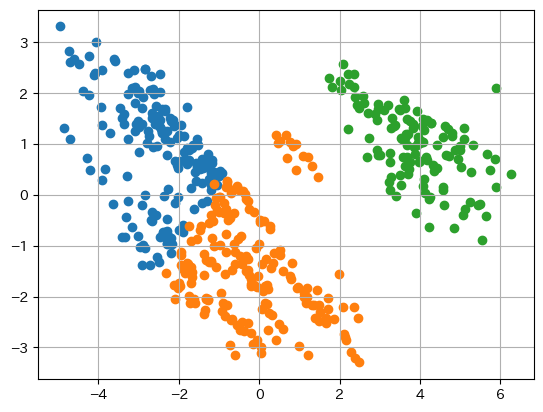

In [126]:
## クラスタリング（k-means）＋主成分分析
from sklearn.decomposition import PCA

def cross(df, num):
    df_cls = df.copy()
    sc = StandardScaler()
    clustering_sc = sc.fit_transform(df_cls)

    # n_clusters：クラスター数
    kmeans = KMeans(n_clusters=num, random_state=42)
    clusters = kmeans.fit(clustering_sc)
    df_cls['cluster'] = clusters.labels_

    x = clustering_sc
    # n_components：削減結果の次元数
    pca = PCA(n_components=num)
    pca.fit(x)
    x_pca = pca.transform(x)
    pca_df = pd.DataFrame(x_pca)
    pca_df['cluster'] = df_cls['cluster']

    for i in df_cls['cluster'].unique():
        tmp = pca_df.loc[pca_df['cluster'] == i]
        plt.scatter(tmp[0], tmp[1])
    plt.grid()
    plt.show()

# 実行
cross(boston_df, 3)

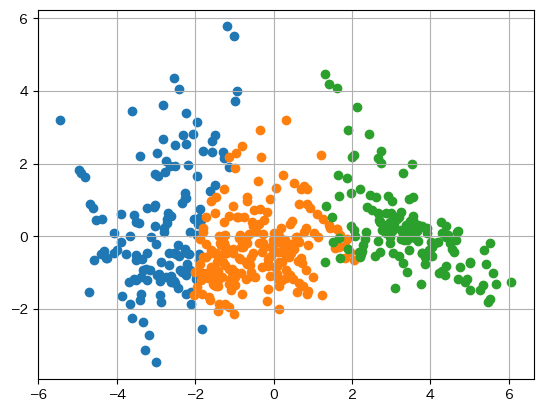

In [123]:
cross(drop_boston, 3)

In [127]:
# 重心からの距離
def get_center_distance(df):
    num_cluster=3 # cluster数
    clusters = KMeans(n_clusters=num_cluster, random_state = 42)
    clusters.fit(df)
    centers = clusters.cluster_centers_

    columns = df.columns
    clust_features = pd.DataFrame(index = df.index)
    for i in range(len(centers)):
        clust_features['クラスタ' + str(i + 1) + 'との距離'] = (df[columns] - centers[i]).applymap(abs).apply(sum, axis = 1)
    return clust_features

# 実行
clust_features = get_center_distance(boston_df)
boston_df[clust_features.columns] = clust_features
boston_df.head()


"""
重心からの距離から何が言えるのだろう？
#疑問

"""

,level_0,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,クラスタ1との距離,クラスタ2との距離,クラスタ3との距離
0,0,0,0.00632,18.0,2.31,0,-0.117120,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,601.337021,1404.153530,280.140722
1,1,1,0.02731,0.0,7.07,0,-0.715355,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,667.032614,1410.933875,318.146622
2,2,2,0.02729,0.0,7.07,0,-0.715355,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,647.215209,1441.637895,331.886198
3,3,3,0.03237,0.0,2.18,0,-0.810726,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,663.951765,1480.516286,371.684589
4,4,4,0.06905,0.0,2.18,0,-0.810726,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,663.661212,1472.908606,364.076909


In [139]:
# SMOTE
from imblearn.over_sampling import SMOTE

column = 'CHAS'
sm = SMOTE(random_state=42)
X = boston_df.drop(columns=column, axis=1)
y = boston_df[column]
X_sample, Y_sample = sm.fit_resample(X, y)


over_sampling = pd.DataFrame()
over_sampling = X_sample
over_sampling[column] = Y_sample
value_counts = over_sampling[column].value_counts()

df = pd.DataFrame()
df['ラベル'] = value_counts.index
df['件数'] = value_counts.values

ratio=[]
ratio.append((value_counts.values[0] / len(over_sampling[column]) * 100).round(decimals=2).astype('str'))
ratio.append((value_counts.values[1] / len(over_sampling[column]) * 100).round(decimals=2).astype('str'))
df['割合'] = [f'{ratio[0]}%', f'{ratio[1]}%']
print(f"全レコード数：{len(over_sampling[column])}")
df

全レコード数：916


,ラベル,件数,割合
0,0,458,50.0%
1,1,458,50.0%


<AxesSubplot:xlabel='CHASカウント', ylabel='Density'>

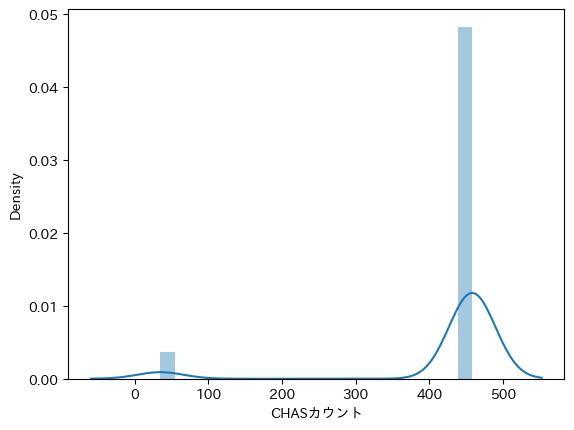

In [153]:
# カウント・エンコーディング
count_map = boston_df['CHAS'].value_counts().to_dict()

df = boston_df.copy()
df['CHASカウント'] = df['CHAS'].map(count_map)
df = df.drop(columns='CHAS', axis=1)
sns.distplot(df['CHASカウント'])